![](http://sigdelta.com/assets/images/sages-sd-logo.png)

# Analiza danych i uczenie maszynowe w Python

Autor notebooka: Jakub Nowacki.

## SVM

[Support Vector Machine (SVM)](https://en.wikipedia.org/wiki/Support_vector_machine) jest algorytmem regresji i klasyfikacji, który jest zbliżony do metod liniowych, ale może wykorzystywać funkcje jądrowe (kernel functions) do mapowania zależności nieliniowych, do przestrzeni liniowej. Takie rozwiązanie nazywa się trikiem jądrowym ([kernel trick](https://en.wikipedia.org/wiki/Kernel_method)). 

![](https://upload.wikimedia.org/wikipedia/commons/1/1b/Kernel_Machine.png)

W tym przykładzie skupimy się na regresji używając SVM.

Wygenerujmy najpierw nielinowe dane.

In [4]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt
%matplotlib inline

# Dane przykładowe w postaci sinusa z szumem
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(8))

Nauczmy teraz modele SVM z różnymi funkcjami jądrowymi.

In [5]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(X, y).predict(X)
y_lin = svr_lin.fit(X, y).predict(X)
y_poly = svr_poly.fit(X, y).predict(X)

Możemy wyniki przedstawić na wspólnym wykresie.

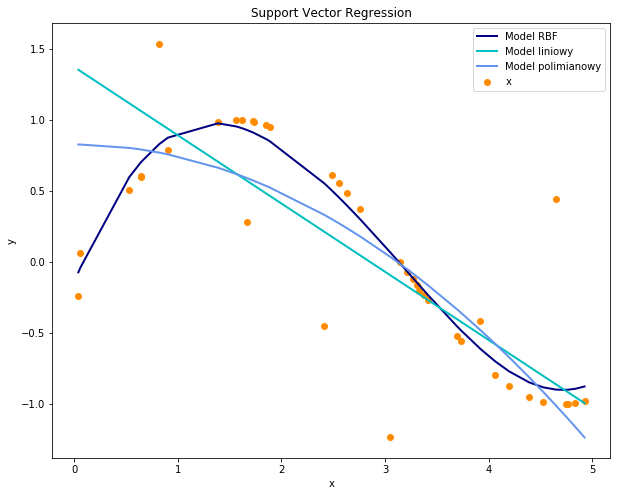

In [6]:
lw = 2
plt.figure(figsize=(10, 8))
plt.scatter(X, y, color='darkorange', label='x')
plt.plot(X, y_rbf, color='navy', lw=lw, label='Model RBF')
plt.plot(X, y_lin, color='c', lw=lw, label='Model liniowy')
plt.plot(X, y_poly, color='cornflowerblue', lw=lw, label='Model polimianowy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [22]:
# %matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.svm import SVR


COLUMNS = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


# Przygotowujemy zbiór danych
diabetes = datasets.load_diabetes()
dataframe = pd.DataFrame(diabetes.data, columns=diabetes.feature_names).assign(target=diabetes.target)

# Dzielimy na zbiór danych treningowych i testowych
dane_treningowe = dataframe.iloc[:-20, :]
dane_testowe = dataframe.iloc[-20:, :]

# Wybór modelu
model = SVR(kernel='linear', C=1e3)

# Nauka modelu
model.fit(dane_treningowe[COLUMNS], dane_treningowe['target'])
dane_testowe = dane_testowe.assign(predict=lambda df: model.predict(df[COLUMNS]))


# Do wyświetlania
wspolczynniki = model.coef_
blad_sredniokwadratowy = mean_squared_error(dane_testowe['target'], model.predict(dane_testowe[COLUMNS]))
metryka_r2_wariancji = r2_score(dane_testowe['target'], dane_testowe['predict'])

print(f'Współczynniki: \n{wspolczynniki}')
print(f'Błąd średniokwadratowy: {blad_sredniokwadratowy:.2f}')
print(f'Metryka R2 (wariancji): {metryka_r2_wariancji:.2f}')



# Wyświetlanie wykresu
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_rbf = svr_rbf.fit(dane_treningowe, dane_testowe).predict(dane_treningowe)
y_lin = svr_lin.fit(dane_treningowe, dane_testowe).predict(dane_treningowe)
y_poly = svr_poly.fit(dane_treningowe, dane_testowe).predict(dane_treningowe)


lw = 2
plt.figure(figsize=(10, 8))
plt.scatter(dane_treningowe, dane_testowe, color='darkorange', label='x')
plt.plot(dane_treningowe, y_rbf, color='navy', lw=lw, label='Model RBF')
plt.plot(dane_treningowe, y_lin, color='c', lw=lw, label='Model liniowy')
plt.plot(dane_treningowe, y_poly, color='cornflowerblue', lw=lw, label='Model polimianowy')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

Współczynniki: 
[[  19.0546905  -283.66044906  422.76668219  396.65414862 -163.53263793
  -101.9464046  -216.43417139  145.20562832  512.30068516   64.6922728 ]]
Błąd średniokwadratowy: 2007.16
Metryka R2 (wariancji): 0.58


ValueError: bad input shape (20, 12)

## Zadanie

1. Wykorzystaj model liniowy SVM do przykładu z cukrzycą; czy jest lepszy?
1. Wykorzystaj model nieliniowy SVM do przykładu z cukrzycą; czy jest lepszy?